## Work with Watts-Strogatz model

In [1]:
import networkx as nx
import time
import matplotlib.pyplot as plt
import random

### Influence of probability p

In [ ]:
# p = 0 -> regular graph
net = nx.watts_strogatz_graph(20, 4, 0)
nx.draw(net, with_labels=True)

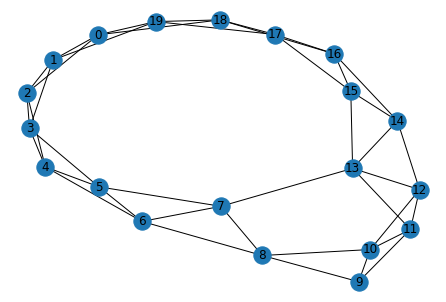

In [3]:
# p = 0.1 -> some reconnections
net = nx.watts_strogatz_graph(20, 4, 0.1)
nx.draw(net, with_labels=True)

In [ ]:
# p = 1 -> randomness
net = nx.watts_strogatz_graph(20, 4, 1.0)
nx.draw(net, with_labels=True)

In [ ]:
# measure time for large network
start = time.process_time()
net = nx.watts_strogatz_graph(2000000, 4, 0.1)
print(time.process_time() - start)
#nx.draw(net, with_labels=True)

### Network properties

In [ ]:
def network_properties(n, k, p):
    net = nx.watts_strogatz_graph(n, k, p)
    print('Graph generated, calculating properties may take some time')
    clust_coeff = nx.average_clustering(net)
    avg_short_path = nx.average_shortest_path_length(net)
    return net, clust_coeff, avg_short_path

In [ ]:
def plot_degree_dist(G):
    degrees = nx.degree_histogram(G)
    plt.scatter(range(len(degrees)), degrees)
    plt.plot(range(len(degrees)), degrees)
    plt.ylabel("Count")
    plt.xlabel("Degree")
    plt.title("Degree distribution")
    #plt.hist(degrees)
    plt.show()

In [ ]:
net, clust_coeff, avg_short_path = network_properties(5000, 15, 0.1)
print('*Clustering coefficient: ', clust_coeff)
print('*Avg. shortest path: ', avg_short_path)
plot_degree_dist(net)

In [11]:
import yaml
with open('config.yaml', 'r') as stream:
    config = config = yaml.safe_load(stream)['watts_strogatz']
    print(config)

{'num_nodes': 5000, 'avg_degree': 15, 'p_reconnect': 0.1}


## Label propagation

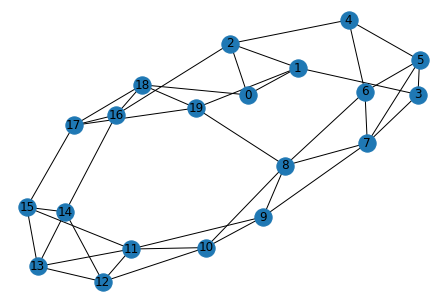

In [63]:
net = nx.watts_strogatz_graph(20, 4, 0.1)
nx.draw(net, with_labels=True)

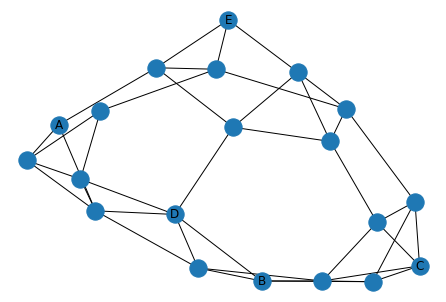

In [64]:
labeled_nodes = random.sample(range(20), k=3)
label_dict = dict({3: 'A', 10: 'B', 13: 'C', 8: 'D', 0: 'E'})
labeled_nodes = list(label_dict.keys())
#nx.classes.function.set_node_attributes(net, None, 'label')
net.nodes[labeled_nodes[0]]['label'] = label_dict[labeled_nodes[0]]
net.nodes[labeled_nodes[1]]['label'] = label_dict[labeled_nodes[1]]
net.nodes[labeled_nodes[2]]['label'] = label_dict[labeled_nodes[2]]
net.nodes[labeled_nodes[3]]['label'] = label_dict[labeled_nodes[3]]
net.nodes[labeled_nodes[4]]['label'] = label_dict[labeled_nodes[4]]
labels = nx.get_node_attributes(net, 'label') 
nx.draw(net, labels=labels)

In [65]:
#communities = list(nx.algorithms.community.label_propagation.label_propagation_communities(net))
#communities = nx.algorithms.community.label_propagation.asyn_lpa_communities(net)
labels = list(nx.algorithms.node_classification.local_and_global_consistency(net))
from collections import Counter

Counter({0: 'E', 1: 'E', 2: 'E', 16: 'E', 18: 'E', 4: 'D', 6: 'D', 7: 'D', 8: 'D', 9: 'D', 19: 'D', 11: 'C', 12: 'C', 13: 'C', 14: 'C', 15: 'C', 17: 'C', 10: 'B', 3: 'A', 5: 'A'})


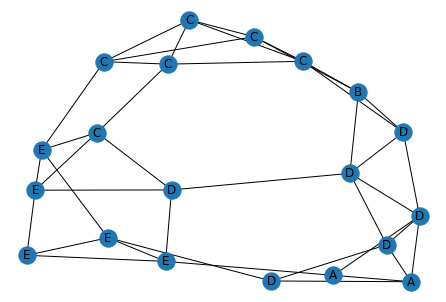

In [67]:
print(Counter(labels))
for node in net.nodes():
    net.nodes()[node]['label'] = labels[node]
labels = nx.get_node_attributes(net, 'label') 
nx.draw(net, labels=labels)

{6, 7, 8, 9, 10}
{8, 10}
{16, 17, 18, 15}
set()
{0, 1, 2, 11, 12, 13, 14, 19}
{0, 13}
{3, 4, 5}
{3}
Counter({'E': 8, 'D': 5, None: 4, 'A': 3})


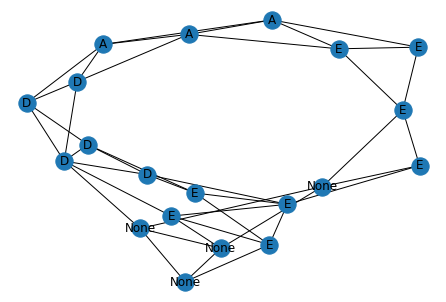

In [36]:
# Label propagation: 
for com in communities:
    print(com)
    labeled_com_node = com & set(labeled_nodes)
    print(labeled_com_node)
    try:
        com_label = label_dict[labeled_com_node.pop()]
    except KeyError:
        com_label = None
    for n in com:
        net.nodes[n]['attr'] = com_label
labels = nx.get_node_attributes(net, 'attr') 
nx.draw(net, labels=labels)
print(Counter(labels.values()))